In [206]:
import re
from dateutil.parser import parse
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
covid_file = "./cov.csv"
influenza_file = "./influenza.csv"
flu_df = pd.read_csv(influenza_file)
cov_df = pd.read_csv(covid_file)


In [4]:
cov_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
202156,2022-04-30,ZW,Zimbabwe,AFRO,58,247842,0,5469
202157,2022-05-01,ZW,Zimbabwe,AFRO,0,247842,0,5469
202158,2022-05-02,ZW,Zimbabwe,AFRO,0,247842,0,5469
202159,2022-05-03,ZW,Zimbabwe,AFRO,0,247842,0,5469


In [148]:
# prepare data for analisis
pol_cov = cov_df[cov_df["Country_code"] == "PL"]
columns = ["Date_reported","New_cases", "Cumulative_cases", "New_deaths", "Cumulative_deaths"]
pol_cov = pol_cov[columns].reset_index().drop("index", axis=1)
pol_cov["Date_reported"] = pd.to_datetime(pol_cov["Date_reported"])
start_date = datetime.datetime(2020,1,1)
stop_date = datetime.datetime(2020,12,31)
mask = (pol_cov["Date_reported"] >= start_date) & (pol_cov["Date_reported"] <= stop_date)
pol_cov = pol_cov[mask]
pol_cov = pol_cov.set_index(pol_cov["Date_reported"]).drop("Date_reported", axis=1)
pol_cov_month = pol_cov.groupby(pol_cov.index.to_period('m')).sum().drop(["Cumulative_cases", "Cumulative_deaths"], axis=1) # get month summary ammount
pol_cov


,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2020-01-03,0,0,0,0
2020-01-04,0,0,0,0
2020-01-05,0,0,0,0
2020-01-06,0,0,0,0
2020-01-07,0,0,0,0
...,...,...,...,...
2020-12-27,3678,1260544,56,27206
2020-12-28,3211,1263755,27,27233
2020-12-29,7914,1271669,311,27544


In [149]:
pol_cov_month = pol_cov_month.reset_index()
pol_cov_month["Date_reported"] = pol_cov_month["Date_reported"].astype(str)
pol_cov_month

,Date_reported,New_cases,New_deaths
0,2020-01,0,0
1,2020-02,0,0
2,2020-03,2055,31
3,2020-04,10585,593
4,2020-05,10931,437
5,2020-06,10583,383
6,2020-07,10877,265
7,2020-08,21839,324
8,2020-09,23092,450
9,2020-10,252872,2868


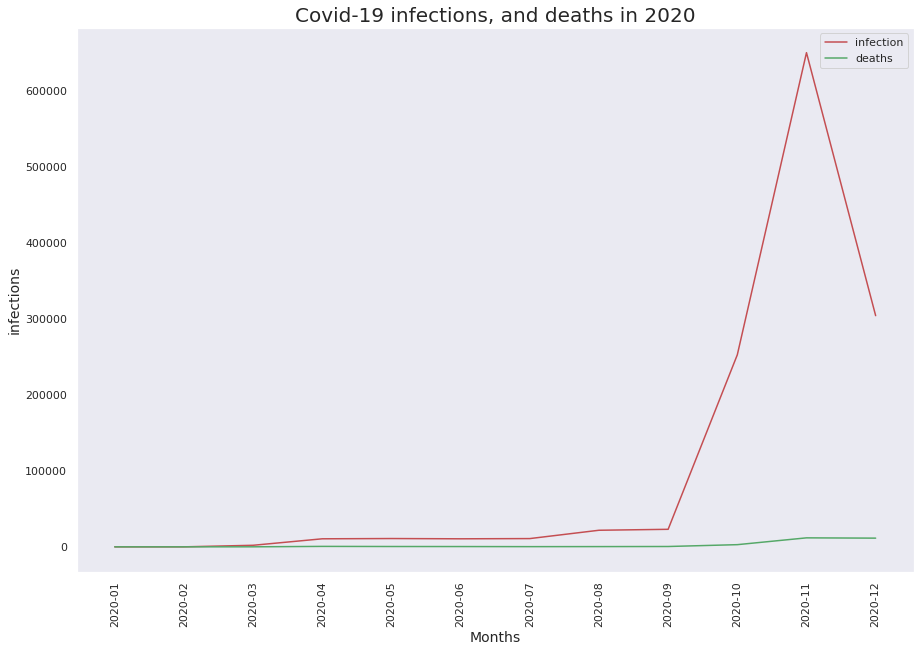

In [152]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel("Months", fontdict={'fontsize': 14})
plt.ylabel("infections", fontdict={'fontsize': 14})
plt.grid()
plt.title("Covid-19 infections, and deaths in 2020", fontdict={'fontsize':20})
plt.plot(pol_cov_month["Date_reported"], pol_cov_month["New_cases"], color='r')
plt.plot(pol_cov_month["Date_reported"], pol_cov_month["New_deaths"], color='g')
plt.legend(["infection", "deaths"])


In [194]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=pol_cov_month["Date_reported"], y=pol_cov_month["New_cases"], name="infected"))
fig.add_trace(go.Scatter(x=pol_cov_month["Date_reported"], y=pol_cov_month["New_deaths"], name="deaths"))
fig.update_layout(title="Covid-19 infections, and deaths 2020 in POLAND",
                    xaxis=dict(
                        tickmode = 'array',
                        tickvals = pol_cov_month["Date_reported"],
                        tickangle=300
                    ),
                    yaxis_title="People",
                    )
# fig.update_xaxes(tickangle=90)
fig.show()

In [217]:
flu_df = flu_df.set_index(flu_df["Unnamed: 0"])
flu_df
def remove_first_number(s):
    patt = "[0-9]*-"
    return re.sub(patt, '',s, 1)
    
val = flu_df.iloc[15,0]
remove_first_number(val)
# flu_df.groupby(flu_df.index.to_period('m')).sum()

'30-4-2020'